In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('Mexico_sin_nulos.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  float64
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_id                      26582 non-null  int64  
 6   host_name                    26582 non-null  object 
 7   host_since                   26582 non-null  object 
 8   host_location                26582 non-null  object 
 9   host_about                   26582 non-null  object 
 10  host_response_time           26582 non-null  object 
 11  host_response_rate           26582 non-null  object 
 12  host_acceptance_rate         26582 non-null  object 
 13  neighbourhood   

In [18]:
cuantitativas = data.iloc[ : , [15,16,19,20,22,23,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,50]]
cualitativas = data.iloc[ : , [1,2,3,4,5,6,7,8,9,11,12,13.14,17,18,21,24,25]]


In [19]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     26582 non-null  float64
 1   longitude                    26582 non-null  float64
 2   accommodates                 26582 non-null  int64  
 3   bathrooms                    26582 non-null  float64
 4   bedrooms                     26582 non-null  float64
 5   beds                         26582 non-null  float64
 6   minimum_nights               26582 non-null  int64  
 7   maximum_nights               26582 non-null  int64  
 8   minimum_minimum_nights       26582 non-null  int64  
 9   maximum_minimum_nights       26582 non-null  int64  
 10  minimum_maximum_nights       26582 non-null  int64  
 11  maximum_maximum_nights       26582 non-null  int64  
 12  minimum_nights_avg_ntm       26582 non-null  float64
 13  maximum_nights_a

In [20]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     26582 non-null  float64
 1   name                   26582 non-null  object 
 2   description            26582 non-null  object 
 3   neighborhood_overview  26582 non-null  object 
 4   host_id                26582 non-null  int64  
 5   host_name              26582 non-null  object 
 6   host_since             26582 non-null  object 
 7   host_location          26582 non-null  object 
 8   host_about             26582 non-null  object 
 9   host_response_rate     26582 non-null  object 
 10  host_acceptance_rate   26582 non-null  object 
 11  neighbourhood          26582 non-null  object 
 12  property_type          26582 non-null  object 
 13  room_type              26582 non-null  object 
 14  bathrooms_text         26582 non-null  object 
 15  am

In [21]:
#Identificar valores nulos por dataframe
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
name                           0
description                    0
neighborhood_overview          0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_ma

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

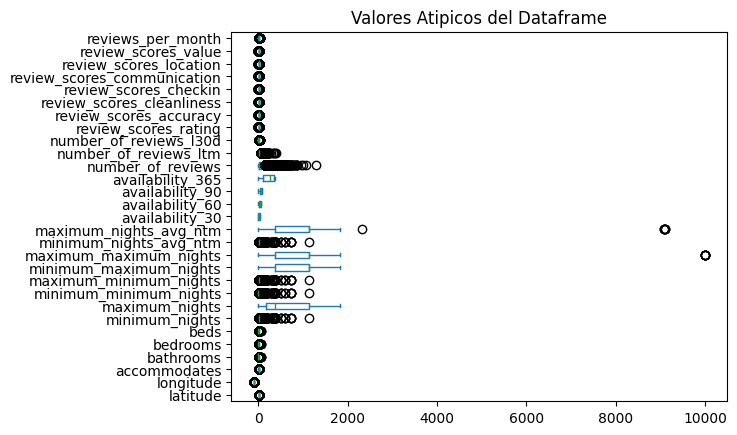

In [22]:
fig = plt.figure (figsize = (15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

In [23]:
#Métodos aplicando desviacion estandar, Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior =  y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido latitude                         19.532892
longitude                       -99.066742
accommodates                     10.430103
bathrooms                         4.608162
bedrooms                          5.346827
beds                              6.956376
minimum_nights                   81.830056
maximum_nights                 1793.886762
minimum_minimum_nights           78.220196
maximum_minimum_nights           80.407806
minimum_maximum_nights         2058.532035
maximum_maximum_nights         2133.457176
minimum_nights_avg_ntm           79.496621
maximum_nights_avg_ntm         2102.282688
availability_30                  48.523868
availability_60                  97.331591
availability_90                 149.606839
availability_365                602.609273
number_of_reviews               271.153557
number_of_reviews_ltm            75.059793
number_of_reviews_l30d            6.823979
review_scores_rating              5.881932
review_scores_accuracy      

In [24]:
#Obtenemos datos y los outliers se convierten en nulos
data2 = cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

latitude  longitude  accommodates  bathrooms  bedrooms  beds  \
0      19.383820        NaN           2.0        1.0       1.0   1.0   
1      19.411620 -99.177940           NaN        1.5       5.0   1.0   
2      19.411520 -99.168570           4.0        1.0       2.0   2.0   
3      19.356140 -99.163080           2.0        1.0       1.0   1.0   
4      19.432110 -99.193270           2.0        1.5       1.0   1.0   
...          ...        ...           ...        ...       ...   ...   
26577  19.387329 -99.246731           4.0        1.0       2.0   2.0   
26578  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26579  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26580  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26581  19.443476 -99.201748           2.0        1.0       1.0   1.0   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
0                 1.0             7.0                     1.0   
1                 1.0           365.0                     1.0   
2                 2.0            30.0                     2.0   
3                 5.0           180.0                     3.0   
4                 1.0           365.0                     1.0   
...               ...             ...                     ...   
26577             1.0            45.0                     2.0   
26578             1.0           365.0                     1.0   
26579             1.0           365.0                     1.0   
26580             1.0           365.0                     1.0   
26581             1.0           365.0                     1.0   

       maximum_minimum_nights  ...  number_of_reviews_ltm  \
0                         1.0  ...                    0.0   
1                         1.0  ...                    0.0   
2                         2.0  ...                    4.0   
3                         5.0  ...                    7.0   
4                         1.0  ...                    0.0   
...                       ...  ...                    ...   
26577                     6.0  ...                    0.0   
26578                     1.0  ...                    0.0   
26579                     1.0  ...                    0.0   
26580                     1.0  ...                    0.0   
26581                     2.0  ...                    0.0   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                         0.0                  4.58                    4.79   
1                         0.0                  4.58                    4.56   
2                         0.0                  4.90                    4.81   
3                         2.0                  4.91                    4.90   
4                         0.0                  4.91                    5.00   
...                       ...                   ...                     ...   
26577                     0.0                  5.00                    4.79   
26578                     0.0                  5.00                    4.79   
26579                     0.0                  5.00                    4.79   
26580                     0.0                  5.00                    4.79   
26581                     0.0                  5.00                    4.79   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.86                   4.87   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...                          ...                    ...   
26577                       4.86                   5.00   
26578                       4.86                   5.00   
26579                       4.86                   5.00   
26580                       4.86                   5.00   
26581                       4.8

In [25]:
#Identificar valores atipicos
valores_nulos = data2.isnull().sum()
valores_nulos

latitude                       357
longitude                      712
accommodates                   526
bathrooms                      309
bedrooms                       286
beds                           466
minimum_nights                 190
maximum_nights                   1
minimum_minimum_nights         174
maximum_minimum_nights         192
minimum_maximum_nights           0
maximum_maximum_nights           7
minimum_nights_avg_ntm         184
maximum_nights_avg_ntm           7
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              608
number_of_reviews_ltm          432
number_of_reviews_l30d         511
review_scores_rating           431
review_scores_accuracy         402
review_scores_cleanliness      437
review_scores_checkin          355
review_scores_communication    435
review_scores_location         295
review_scores_value            480
reviews_per_month   

In [26]:
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

latitude  longitude  accommodates  bathrooms  bedrooms  beds  \
0      19.383820 -99.200000           2.0        1.0       1.0   1.0   
1      19.411620 -99.177940           3.1        1.5       5.0   1.0   
2      19.411520 -99.168570           4.0        1.0       2.0   2.0   
3      19.356140 -99.163080           2.0        1.0       1.0   1.0   
4      19.432110 -99.193270           2.0        1.5       1.0   1.0   
...          ...        ...           ...        ...       ...   ...   
26577  19.387329 -99.246731           4.0        1.0       2.0   2.0   
26578  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26579  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26580  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26581  19.443476 -99.201748           2.0        1.0       1.0   1.0   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
0                 1.0             7.0                     1.0   
1                 1.0           365.0                     1.0   
2                 2.0            30.0                     2.0   
3                 5.0           180.0                     3.0   
4                 1.0           365.0                     1.0   
...               ...             ...                     ...   
26577             1.0            45.0                     2.0   
26578             1.0           365.0                     1.0   
26579             1.0           365.0                     1.0   
26580             1.0           365.0                     1.0   
26581             1.0           365.0                     1.0   

       maximum_minimum_nights  ...  number_of_reviews_ltm  \
0                         1.0  ...                    0.0   
1                         1.0  ...                    0.0   
2                         2.0  ...                    4.0   
3                         5.0  ...                    7.0   
4                         1.0  ...                    0.0   
...                       ...  ...                    ...   
26577                     6.0  ...                    0.0   
26578                     1.0  ...                    0.0   
26579                     1.0  ...                    0.0   
26580                     1.0  ...                    0.0   
26581                     2.0  ...                    0.0   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                         0.0                  4.58                    4.79   
1                         0.0                  4.58                    4.56   
2                         0.0                  4.90                    4.81   
3                         2.0                  4.91                    4.90   
4                         0.0                  4.91                    5.00   
...                       ...                   ...                     ...   
26577                     0.0                  5.00                    4.79   
26578                     0.0                  5.00                    4.79   
26579                     0.0                  5.00                    4.79   
26580                     0.0                  5.00                    4.79   
26581                     0.0                  5.00                    4.79   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.86                   4.87   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...                          ...                    ...   
26577                       4.86                   5.00   
26578                       4.86                   5.00   
26579                       4.86                   5.00   
26580                       4.86                   5.00   
26581                       4.8

In [27]:
#Identificar valores atipicos
valores_nulos = data_clean.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

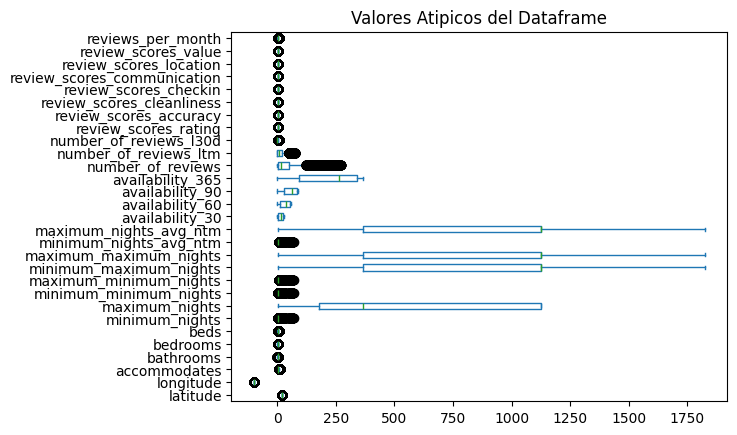

In [28]:
fig = plt.figure (figsize = (15, 8))
data_clean.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

**PROCEDIMIENTO "CUANTILOS"**

In [29]:
y = cuantitativas
percentiles25 = y.quantile(0.25) # Q1
percentiles75 = y.quantile(0.75) # Q3
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido latitude                         19.494089
longitude                       -99.117734
accommodates                      7.000000
bathrooms                         3.500000
bedrooms                          3.500000
beds                              3.500000
minimum_nights                    3.500000
maximum_nights                 2542.500000
minimum_minimum_nights            3.500000
maximum_minimum_nights            6.000000
minimum_maximum_nights         2265.000000
maximum_maximum_nights         2265.000000
minimum_nights_avg_ntm            5.250000
maximum_nights_avg_ntm         2265.000000
availability_30                  63.500000
availability_60                 113.000000
availability_90                 162.500000
availability_365                710.500000
number_of_reviews               135.500000
number_of_reviews_ltm            52.500000
number_of_reviews_l30d            5.000000
review_scores_rating              5.375000
review_scores_accuracy      

In [30]:
#Obtenemos datos limpios del Dataframe
data2_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

latitude  longitude  accommodates  bathrooms  bedrooms  beds  \
0      19.383820        NaN           2.0        1.0       1.0   1.0   
1      19.411620 -99.177940           NaN        1.5       NaN   1.0   
2      19.411520 -99.168570           4.0        1.0       2.0   2.0   
3      19.356140 -99.163080           2.0        1.0       1.0   1.0   
4      19.432110 -99.193270           2.0        1.5       1.0   1.0   
...          ...        ...           ...        ...       ...   ...   
26577  19.387329        NaN           4.0        1.0       2.0   2.0   
26578  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26579  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26580  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26581  19.443476 -99.201748           2.0        1.0       1.0   1.0   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
0                 1.0               7                     1.0   
1                 1.0             365                     1.0   
2                 2.0              30                     2.0   
3                 NaN             180                     3.0   
4                 1.0             365                     1.0   
...               ...             ...                     ...   
26577             1.0              45                     2.0   
26578             1.0             365                     1.0   
26579             1.0             365                     1.0   
26580             1.0             365                     1.0   
26581             1.0             365                     1.0   

       maximum_minimum_nights  ...  number_of_reviews_ltm  \
0                         1.0  ...                    0.0   
1                         1.0  ...                    0.0   
2                         2.0  ...                    4.0   
3                         5.0  ...                    7.0   
4                         1.0  ...                    0.0   
...                       ...  ...                    ...   
26577                     6.0  ...                    0.0   
26578                     1.0  ...                    0.0   
26579                     1.0  ...                    0.0   
26580                     1.0  ...                    0.0   
26581                     2.0  ...                    0.0   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                         0.0                  4.58                    4.79   
1                         0.0                  4.58                    4.56   
2                         0.0                  4.90                    4.81   
3                         2.0                  4.91                    4.90   
4                         0.0                  4.91                    5.00   
...                       ...                   ...                     ...   
26577                     0.0                  5.00                    4.79   
26578                     0.0                  5.00                    4.79   
26579                     0.0                  5.00                    4.79   
26580                     0.0                  5.00                    4.79   
26581                     0.0                  5.00                    4.79   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.86                   4.87   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...                          ...                    ...   
26577                       4.86                   5.00   
26578                       4.86                   5.00   
26579                       4.86                   5.00   
26580                       4.86                   5.00   
26581                       4.8

In [31]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

latitude                       1779
longitude                      2845
accommodates                   1352
bathrooms                       644
bedrooms                        858
beds                           2447
minimum_nights                 3584
maximum_nights                    0
minimum_minimum_nights         3124
maximum_minimum_nights         2040
minimum_maximum_nights            0
maximum_maximum_nights            7
minimum_nights_avg_ntm         2023
maximum_nights_avg_ntm            7
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              2328
number_of_reviews_ltm          1318
number_of_reviews_l30d          813
review_scores_rating           1650
review_scores_accuracy         2198
review_scores_cleanliness      1987
review_scores_checkin          1906
review_scores_communication    2085
review_scores_location         1932
review_scores_value         

In [32]:
#Reemplazamos valores atipicops (nulos) del dataframe con "mean"

data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2.mean(),1))
data3_iqr

latitude  longitude  accommodates  bathrooms  bedrooms  beds  \
0      19.383820 -99.200000           2.0        1.0       1.0   1.0   
1      19.411620 -99.177940           3.1        1.5       1.5   1.0   
2      19.411520 -99.168570           4.0        1.0       2.0   2.0   
3      19.356140 -99.163080           2.0        1.0       1.0   1.0   
4      19.432110 -99.193270           2.0        1.5       1.0   1.0   
...          ...        ...           ...        ...       ...   ...   
26577  19.387329 -99.200000           4.0        1.0       2.0   2.0   
26578  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26579  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26580  19.432687 -99.197736           2.0        1.0       1.0   1.0   
26581  19.443476 -99.201748           2.0        1.0       1.0   1.0   

       minimum_nights  maximum_nights  minimum_minimum_nights  \
0                 1.0               7                     1.0   
1                 1.0             365                     1.0   
2                 2.0              30                     2.0   
3                 3.0             180                     3.0   
4                 1.0             365                     1.0   
...               ...             ...                     ...   
26577             1.0              45                     2.0   
26578             1.0             365                     1.0   
26579             1.0             365                     1.0   
26580             1.0             365                     1.0   
26581             1.0             365                     1.0   

       maximum_minimum_nights  ...  number_of_reviews_ltm  \
0                         1.0  ...                    0.0   
1                         1.0  ...                    0.0   
2                         2.0  ...                    4.0   
3                         5.0  ...                    7.0   
4                         1.0  ...                    0.0   
...                       ...  ...                    ...   
26577                     6.0  ...                    0.0   
26578                     1.0  ...                    0.0   
26579                     1.0  ...                    0.0   
26580                     1.0  ...                    0.0   
26581                     2.0  ...                    0.0   

       number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                         0.0                  4.58                    4.79   
1                         0.0                  4.58                    4.56   
2                         0.0                  4.90                    4.81   
3                         2.0                  4.91                    4.90   
4                         0.0                  4.91                    5.00   
...                       ...                   ...                     ...   
26577                     0.0                  5.00                    4.79   
26578                     0.0                  5.00                    4.79   
26579                     0.0                  5.00                    4.79   
26580                     0.0                  5.00                    4.79   
26581                     0.0                  5.00                    4.79   

       review_scores_cleanliness  review_scores_checkin  \
0                           4.86                   4.87   
1                           4.70                   4.87   
2                           4.75                   4.94   
3                           4.96                   4.96   
4                           5.00                   5.00   
...                          ...                    ...   
26577                       4.86                   5.00   
26578                       4.86                   5.00   
26579                       4.86                   5.00   
26580                       4.86                   5.00   
26581                       4.8

In [33]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [ ]:
Datos_limpios = pd.concat([cualitativas, data3_iqr ] , axis=1)
Datos_limpios

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

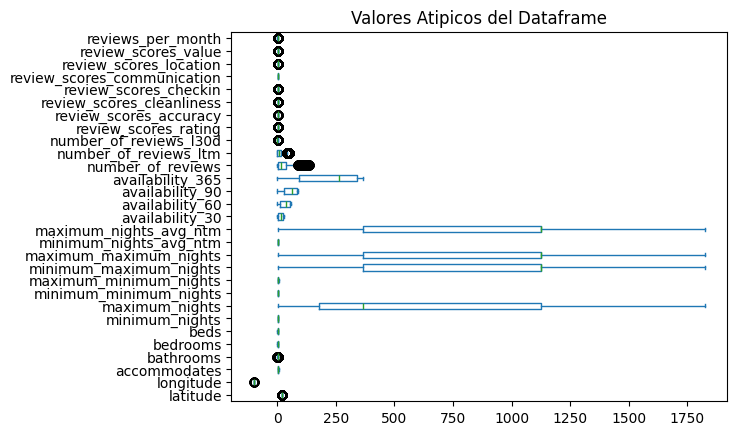

In [35]:
fig = plt.figure (figsize = (15, 8))
data3_iqr.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show